Created on Tuesday 5 January 2021

**Group 5 - Classification**  
**Function visual extraction v0**

@authors : Jeremy Johann

The notebook contains a function to clean up the data and functions to make visual representations of the articles.

# Create link between drive and notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import libraries

In [ ]:
import re
import nltk
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.decomposition import PCA
from wordcloud import WordCloud, STOPWORDS
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Import data

In [ ]:
data: pd.DataFrame = pd.read_csv(
    "/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/Data_With_Features_Syntax.csv")

# Functions

### Data preprocessing 

The "preprocessing" function removes empty words, punctuation, puts all articles in lowercase, ... It cleans up the articles. 

In [ ]:
# Data cleaning
def preprocessing(sentence: str) -> str:
    """Documentation
    Parameters:
        data: 1 column of a dataframe especially choose because we want a column who contain only text

    Out (if exists):
        liste_return: liste of all the text of the dataframe return with preprocessing applied
    """
    stop_words: set = set(stopwords.words('french'))
    pattern: list = ['(', ')', ':', ';', ',', '&', '/',
               '"', "'", '\n', '©', 'n°', '-']
    if not isinstance(sentence, str):
        sentence: str = str(sentence)

    sentence: str = re.sub(r'\d', ' ', sentence)
    sentence: str = sentence.lower()

    for d in pattern:
        sentence: str = sentence.replace(d, " ")

    token_words: list = word_tokenize(sentence)
    filtre: type = [w for w in token_words if not w in stop_words]

    final_list: str = ""
    for word in filtre:
        final_list: str = final_list + word + " "
    return (final_list)

### Visual representation

The following functions allow you to make visual representations such as word clouds and dimension reduction in 2D and 3D.

In [ ]:
# Generates a word cloud for an article
def wordcloud_art(text: str):
    """Documentation
    Parameters:
        text: the article that will be show on the word cloud
    """
    text: str = preprocessing(text)
    if len(text) > 0:
        wordcloud: str = WordCloud(relative_scaling=1.0,).generate(str(text))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
        plt.close()
    else:
        print("The article have a size of 0.")

In [ ]:
# Generates a word cloud from a list of articles
def wordcloud_list_art(text: list):
    """Documentation
    Parameters:
        text: the list of articles that will be show on the word cloud
    """
    list_articles: str = ""
    for i in range(len(text)):
        list_articles: str = list_articles + text[0]
    wordcloud_art(text)

In [ ]:
# Visualization of a 2D point cloud with a PCA
def graph_2d(data: pd.DataFrame, prediction: pd.Series, dic_values: dict, transparency: float = 0.15):
    """Documentation
    Parameters:
        data: the data that will be show on the plot
        prediction: the prediction that will be used to make distinction bewteen the differents class on the plot
        dic_values: the signification of every values in the prediction
        transparency: the transparency of the points on the graph
    """
    components = data.shape[1]
    sc: StandardScaler = StandardScaler()
    X: ndarray = sc.fit_transform(data)

    pca: PCA = PCA(n_components=components)
    X: ndarray = pca.fit_transform(X)

    plt.title('Titre')
    for name_modal in dic_values:
        plt.scatter(X[prediction == dic_values[name_modal], 0], X[prediction ==
                                                                  dic_values[name_modal], 1], alpha=transparency, label=name_modal)
    plt.legend()

In [ ]:
# Visualization of a 3D point cloud with a PCA
def graph_3d(data: pd.DataFrame, prediction: pd.Series, axes=(0,1,2), opacity: int = 1):
    """Documentation
    Parameters:
        data: the data that will be show on the plot
        prediction: the prediction that will be used to make distinction bewteen the differents class on the plot
        axes: axes to plot
        opacity: the transparency of the points on the graph
    """
    components = data.shape[1]
    sc: StandardScaler = StandardScaler()
    X: ndarray = sc.fit_transform(data)

    pca: PCA = PCA(n_components=components)
    X: ndarray = pca.fit_transform(X)

    data_plot: pd.DataFrame = pd.DataFrame(X)
    data_plot["prediction"] = prediction
    fig: Figure = px.scatter_3d(data_plot, x= 0, y= 1, z= 2, color='prediction', opacity=0.5)
    fig.show()

# Exemple of use of the function

### Data for PCA

In [ ]:
data_acp: pd.DataFrame = data.copy()
data_acp.drop(["art_id", "art_content", "art_content_html", "art_extract_datetime", "art_lang", "art_title",
               "art_url", "src_name", "src_type", "src_url", "src_img", "art_auth", "art_tag", "title_postive_score", "title_negative_score",
               "title_polarity_score", "title_subjectivity_score", "netloc.com", "ratio_word_title_on_word"], axis=1, inplace=True)
data_acp["average_word_sentence"] = data_acp["average_word_sentence"].fillna(0)
clf: LocalOutlierFactor = LocalOutlierFactor(n_neighbors=2, contamination=0.05)
y = clf.fit_predict(data_acp)

### Dimension reduction with visualisation

In [ ]:
dic_values: dict = {"good": 1, "bad": -1}

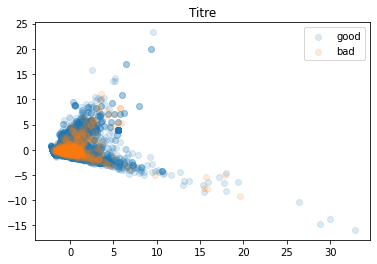

In [ ]:
graph_2d(data_acp, y, dic_values)

In [ ]:
y = pd.Series(y).replace([-1,1],["New","Old"])
graph_3d(data_acp, y, dic_values)

### Word Cloud

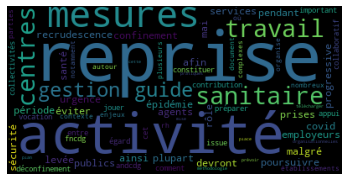

In [ ]:
wordcloud_art(data.loc[2, "art_content"])

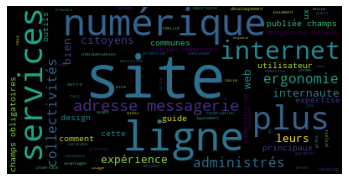

In [ ]:
wordcloud_list_art(data.loc[80:82, "art_content"].tolist())